# Identify redditors

In [1]:
import os
import pandas as pd

import pickle
from collections import Counter
from tqdm import tqdm
import numpy as np

import seaborn as sns

In [110]:
from _00_text_utils import title_process, process_quoting, comment_process, selftext_process

In [3]:
with open(f'{os.getcwd()}/data/redditor_counts.pkl', 'rb') as f:
    author_to_cnt = pickle.load(f)
author_to_cnt_sorted = sorted(author_to_cnt.items(), key=lambda x:x[1], reverse=True)

In [4]:
print(f"total number of authors: {len(author_to_cnt.keys())}")

total number of authors: 1589498


In [5]:
j, thr_list = 0, [2000, 1000, 500, 200, 100]
for i, elem in enumerate(author_to_cnt_sorted):
    if elem[1] < thr_list[j]:
        print(f"{i} authors commented more than {thr_list[j]}")
        j += 1
    if j >= len(thr_list):
        break

653 authors commented more than 2000
2491 authors commented more than 1000
7583 authors commented more than 500
24645 authors commented more than 200
52472 authors commented more than 100


## Analyze the crawl by subIDs

In [12]:
df_active = pd.read_csv(f"{os.getcwd()}/data/directComms_active.tsv", sep="\t")

In [6]:
directory = os.fsencode(f'{os.getcwd()}/data/intermediate')
df_list = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".tsv") and "bySubID" in filename:
        filepath = os.path.join(f'{os.getcwd()}/data/intermediate', filename)
        _df = pd.read_csv(filepath, sep='\t')
        df_list.append(_df)
df_active_allAuthors = pd.concat(df_list, ignore_index=True)

In [7]:
df_active_allAuthors.head()

,subID,subAuthor,title,selftext,commID,commAuthor,comment,judgment
0,h0lfjt,Immediate-Accident96,AITA for not wanting to share my wedding day w...,My (27F) fiancée (28M) and I have been dating ...,ftn42r6,MaedayDuck,NTA wow the Balls in her to even ask that. The...,1
1,h0ac5j,RandomOptimist,AITA for taking the best parking spot away fro...,"First and foremost, I have a heart condition. ...",ftn46m1,Rivka333,"&gt;Furthermore, since I work from home, once ...",0
2,h0eavk,Snoo-32512,"AITA for taking $15,000 out of my daughters co...","I have an 8 year old daughter, and to make col...",ftn4hqz,SuperbCycle1,"YTA, you shouldn't even have to ask.\n\nYou st...",0
3,h0eavk,Snoo-32512,"AITA for taking $15,000 out of my daughters co...","I have an 8 year old daughter, and to make col...",ftn4vjg,ABucketofBeetles,This is a troll. \n\nYTA.,0
4,h0eavk,Snoo-32512,"AITA for taking $15,000 out of my daughters co...","I have an 8 year old daughter, and to make col...",ftn4xds,oanna,NTA I hope she sues you.,1


In [8]:
commAuthor_cnt = Counter()
commAuthor_cnt.update(df_active_allAuthors.commAuthor.tolist())
commAuthor_cnt_sorted =sorted(commAuthor_cnt.items(), key=lambda x:x[1], reverse=True)

In [9]:
print(f"total number of authors in focus subIDs: {len(commAuthor_cnt_sorted)}")

total number of authors in focus subIDs: 645587


In [10]:
j, thr_list = 0, [2000, 1000, 500, 200, 100]
for i, elem in enumerate(commAuthor_cnt_sorted):
    if elem[1] < thr_list[j]:
        print(f"{i} authors commented more than {thr_list[j]}")
        j += 1
    if j >= len(thr_list):
        break

10 authors commented more than 2000
24 authors commented more than 1000
104 authors commented more than 500
901 authors commented more than 200
3322 authors commented more than 100


## Analyze the crawl by Frequency

In [16]:
directory = os.fsencode(f'{os.getcwd()}/data/intermediate')
df_list = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".tsv") and "byFrequency" in filename:
        filepath = os.path.join(f'{os.getcwd()}/data/intermediate', filename)
        _df = pd.read_csv(filepath, sep='\t')
        df_list.append(_df)
df_active_allAuthors_byFreq = pd.concat(df_list, ignore_index=True)

In [22]:
remove_indices = []
for idx, row in df_active_allAuthors_byFreq.iterrows():
    if row['selftext'] in ['[deleted]', '[removed]']:
        remove_indices.append(idx)
df_active_allAuthors_byFreq.drop(remove_indices, inplace=True)

In [23]:
commAuthor_cnt_byFreq = Counter()
commAuthor_cnt_byFreq.update(df_active_allAuthors_byFreq.commAuthor.tolist())
commAuthor_cnt_byFreq_sorted =sorted(commAuthor_cnt_byFreq.items(), key=lambda x:x[1], reverse=True)

In [24]:
print(f"total number of authors by Frequency: {len(commAuthor_cnt_byFreq_sorted)}")

total number of authors by Frequency: 7500


In [25]:
j, thr_list = 0, [2000, 1000, 500, 200, 100]
for i, elem in enumerate(commAuthor_cnt_byFreq_sorted):
    if elem[1] < thr_list[j]:
        print(f"{i} authors commented more than {thr_list[j]}")
        j += 1
    if j >= len(thr_list):
        break

217 authors commented more than 2000
969 authors commented more than 1000
3436 authors commented more than 500
7487 authors commented more than 200


In [26]:
len(list(set(df_active_allAuthors_byFreq.subID.tolist())))

393721

## Analyze comments based on their length
- Previous threshold: 50<x<100
- Check if the whole distribution of an author is not so different from the threshold

In [39]:
def get_comment_length(text):
    text_splits = text.split("\n")
    resulting_texts = []
    for elem in text_splits:
        if elem.startswith('&gt;'):
            continue
        else:
            resulting_texts.append(elem)
    restored_text = "\n".join(resulting_texts)
    return len(restored_text.split())

### data crawled by frequency 

In [72]:
author_to_judgments, author_to_commLengths = {}, {}

for idx, row in tqdm(df_active_allAuthors_byFreq.iterrows()):
    if row['commAuthor'] not in author_to_judgments:
        author_to_judgments[row['commAuthor']] = []
        author_to_commLengths[row['commAuthor']] = []
    author_to_judgments[row['commAuthor']].append(row['judgment'])
    author_to_commLengths[row['commAuthor']].append(get_comment_length(row['comment']))

author_to_goodCommentLength_judgments = {}
for _author in author_to_judgments:
    author_to_goodCommentLength_judgments[_author] = []
    for _j, _cl in zip(author_to_judgments[_author], author_to_commLengths[_author]):
        if _cl >= 50 and _cl <= 100:
            author_to_goodCommentLength_judgments[_author].append(_j)

4855350it [02:52, 28171.11it/s]


In [73]:
author_to_distDiff = {}
for _author in author_to_judgments:
    if len(author_to_goodCommentLength_judgments[_author]) < 100:
        continue
    overall_dist = sum(author_to_judgments[_author]) / len(author_to_judgments[_author])
    focus_dist = sum(author_to_goodCommentLength_judgments[_author]) / len(author_to_goodCommentLength_judgments[_author])
    author_to_distDiff[_author] = abs(overall_dist-focus_dist)

author_to_distDiff_sorted = sorted(author_to_distDiff.items(), key=lambda x:x[1], reverse=True)

In [74]:
len(author_to_distDiff_sorted)

4823

<Axes: xlabel='distDiff', ylabel='Count'>

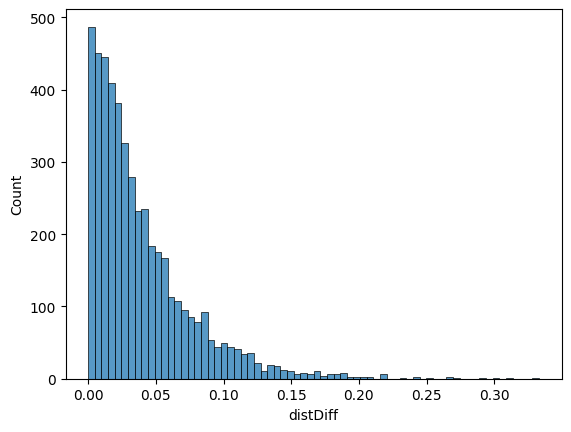

In [75]:
df_distDiff = pd.DataFrame(data={'distDiff':[elem[1] for elem in author_to_distDiff_sorted]})
sns.histplot(data=df_distDiff, x="distDiff")

In [76]:
print("80% coverage",author_to_distDiff_sorted[-int(len(author_to_distDiff_sorted)*0.8)][1])
print("90% coverage",author_to_distDiff_sorted[-int(len(author_to_distDiff_sorted)*0.9)][1])

80% coverage 0.06258653627074684
90% coverage 0.08787674313990113


### data crawled by same subID

In [123]:
author_to_judgments_subID, author_to_commLengths_subID = {}, {}

for idx, row in tqdm(df_active_allAuthors.iterrows()):
    if row['commAuthor'] not in author_to_judgments_subID:
        author_to_judgments_subID[row['commAuthor']] = []
        author_to_commLengths_subID[row['commAuthor']] = []
    author_to_judgments_subID[row['commAuthor']].append(row['judgment'])
    author_to_commLengths_subID[row['commAuthor']].append(get_comment_length(row['comment']))

author_to_goodCommentLength_judgments_subID = {}
for _author in author_to_judgments_subID:
    author_to_goodCommentLength_judgments_subID[_author] = []
    for _j, _cl in zip(author_to_judgments_subID[_author], author_to_commLengths_subID[_author]):
        if _cl >= 50 and _cl <= 100:
            author_to_goodCommentLength_judgments_subID[_author].append(_j)

3547255it [01:34, 37723.36it/s]


In [124]:
author_to_distDiff_subID = {}
for _author in author_to_judgments_subID:
    if len(author_to_goodCommentLength_judgments_subID[_author]) < 100:
        continue
    overall_dist = sum(author_to_judgments_subID[_author]) / len(author_to_judgments_subID[_author])
    focus_dist = sum(author_to_goodCommentLength_judgments_subID[_author]) / len(author_to_goodCommentLength_judgments_subID[_author])
    author_to_distDiff_subID[_author] = abs(overall_dist-focus_dist)

author_to_distDiff_sorted_subID = sorted(author_to_distDiff_subID.items(), key=lambda x:x[1], reverse=True)

In [125]:
len(author_to_distDiff_sorted_subID)

284

<Axes: xlabel='distDiff_subID', ylabel='Count'>

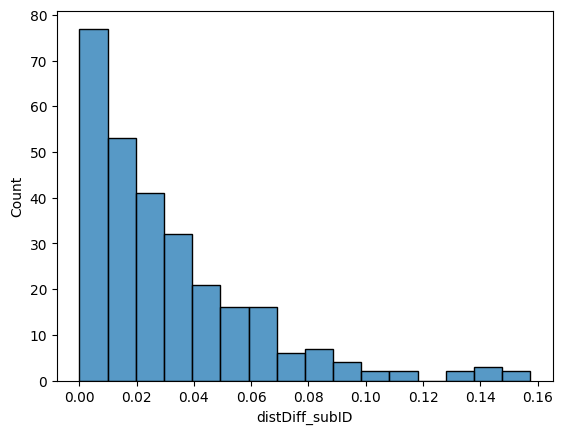

In [127]:
df_distDiff_subID = pd.DataFrame(data={'distDiff_subID':[elem[1] for elem in author_to_distDiff_sorted_subID]})
sns.histplot(data=df_distDiff_subID, x="distDiff_subID")

In [128]:
print("80% coverage",author_to_distDiff_sorted_subID[-int(len(author_to_distDiff_sorted_subID)*0.8)][1])
print("90% coverage",author_to_distDiff_sorted_subID[-int(len(author_to_distDiff_sorted_subID)*0.9)][1])

80% coverage 0.05039584632486516
90% coverage 0.06834558823529413


### Check the actual length of subIDs for valid cases, when we do by frequency

In [88]:
authors_with_minimal_diff = [elem[0] for elem in author_to_distDiff_sorted[-int(len(author_to_distDiff_sorted)*0.8):]]

In [90]:
all_valid_indices = []
for idx, row in tqdm(df_active_allAuthors_byFreq.iterrows()):
    if row['commAuthor'] not in authors_with_minimal_diff:
        continue
    _commLength = get_comment_length(row['comment'])
    if _commLength < 50 or _commLength > 100:
        continue
    all_valid_indices.append(idx)

4855350it [03:58, 20387.47it/s]


In [93]:
df_active_allAuthors_byFreq_valid = df_active_allAuthors_byFreq.loc[all_valid_indices]

In [99]:
len(list(set(df_active_allAuthors_byFreq_valid.subID.tolist()))), len(valid_author_cnt_byFreq_s)

(217338, 3858)

In [96]:
valid_author_cnt_byFreq = Counter()
valid_author_cnt_byFreq.update(df_active_allAuthors_byFreq_valid.commAuthor.tolist())
valid_author_cnt_byFreq_s = sorted(valid_author_cnt_byFreq.items(), key=lambda x:x[1], reverse=True)

<Axes: xlabel='authorCnt', ylabel='Count'>

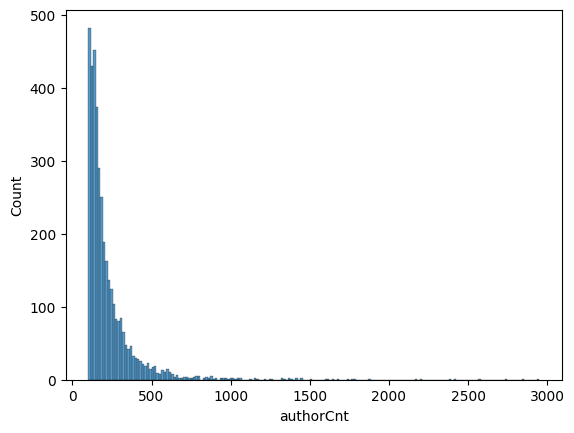

In [100]:
df_authorCnt = pd.DataFrame(data={'authorCnt':[elem[1] for elem in valid_author_cnt_byFreq_s]})
sns.histplot(data=df_authorCnt, x="authorCnt")

In [105]:
df_active_allAuthors_byFreq_valid.reset_index(inplace=True, drop=True)

In [111]:
df_active_allAuthors_byFreq_valid.drop(['subAuthor', 'commID'], axis=1, inplace=True)

In [112]:
df_active_allAuthors_byFreq_valid['title'] = df_active_allAuthors_byFreq_valid['title'].apply(lambda x:title_process(x))

In [114]:
df_active_allAuthors_byFreq_valid['selftext'] = df_active_allAuthors_byFreq_valid['selftext'].apply(lambda x:selftext_process(x))

In [115]:
df_active_allAuthors_byFreq_valid['comment'] = df_active_allAuthors_byFreq_valid['comment'].apply(lambda x:comment_process(x))
df_active_allAuthors_byFreq_valid['comment'] = df_active_allAuthors_byFreq_valid['comment'].apply(lambda x:process_quoting(x))

In [119]:
df_active_allAuthors_byFreq_valid.drop(invalid_indices, inplace=True)

In [120]:
df_active_allAuthors_byFreq_valid.reset_index(inplace=True, drop=True)

In [121]:
df_active_allAuthors_byFreq_valid

,subID,title,selftext,commAuthor,comment,judgment
0,h0ghw3,asking my boyfriend to stop wearing suits outs...,"I know this sounds weird, but here goes:\n\nI ...",WinchesterFan1980,"This is a daughter problem, not a suit problem...",0
1,h0jty3,telling my male friend that he’s shit at sex,"One of my (24F) male friends, I’ll call Jack (...",pluckyminna,It's fucking inappropriate for him to bring up...,0
2,h0n98t,not eating my wife’s spicy cooking,My wife insists on cooking dinner every night ...,WeaverFan420,My wife and I are the opposite - I love spicy ...,1
3,h0lqgh,telling my best friend of 15 years that I don'...,"Friend got engaged to a guy over xmas, and I'm...",JenningsWigService,except the fiancé You will have to stop inviti...,1
4,h0nudu,I skip my childhood BEST friend's wedding,My best friend growing up is getting married t...,JeepersCreepers74,Doesn't sound like you are still close enough ...,1
...,...,...,...,...,...,...
891461,r9r2d8,using a diamond from my girlfriends family hei...,My girlfriend (22f) and I (24m) have been toge...,ginsengtea3,Thought exercise: your grandfather passed away...,0
891462,r9r2d8,using a diamond from my girlfriends family hei...,My girlfriend (22f) and I (24m) have been toge...,plm56,"You were warned, and you were arrogant enough ...",0
891463,r9if9l,not wanting to take care of my adult brother?,My brother and I do not have a relationship at...,DrWhoop87,When I read the title I thought that the broth...,1
891464,r9r2d8,using a diamond from my girlfriends family hei...,My girlfriend (22f) and I (24m) have been toge...,PDK112,Your girlfriend wasn't sentimental with the di...,0


In [122]:
df_active_allAuthors_byFreq_valid.to_csv(f'{os.getcwd()}/data/data_active_ext.tsv', sep='\t', index=False)

### Create data uses the same subID sets

- 17.5K situations are selected based on the most active 8 redditors
- Get all other redditors who commented on these situations
- Exclude comments that are too short (less than 50 words) or too long (more than 100 words)
- Exclude redditors who have too much differences in judgment distributions between short+long comments and moderate-length comments
    - To ensure each comment conveys enough information about subjectivity AND these comments are not so much different from others
- Exclude redditors who commented less than 100

In [129]:
authors_with_minimal_diff_subID = [elem[0] for elem in author_to_distDiff_sorted_subID[-int(len(author_to_distDiff_sorted_subID)*0.8):]]

In [131]:
len(authors_with_minimal_diff_subID)

227

In [140]:
all_valid_indices = []
for idx, row in tqdm(df_active_allAuthors.iterrows()):
    if row['commAuthor'] not in authors_with_minimal_diff_subID:
        continue
    if row['commAuthor'] == '[deleted]':
        continue
    _commLength = get_comment_length(row['comment'])
    if _commLength < 50 or _commLength > 100:
        continue
    all_valid_indices.append(idx)

3547255it [00:52, 67498.83it/s]


In [141]:
df_active_allAuthors_valid = df_active_allAuthors.loc[all_valid_indices]

In [142]:
valid_author_cnt_bySubID = Counter()
valid_author_cnt_bySubID.update(df_active_allAuthors_valid.commAuthor.tolist())
valid_author_cnt_bySubID_s = sorted(valid_author_cnt_bySubID.items(), key=lambda x:x[1], reverse=True)

len(list(set(df_active_allAuthors_valid.subID.tolist()))), len(valid_author_cnt_bySubID_s)

(17224, 226)

In [143]:
df_active_allAuthors_valid.reset_index(inplace=True, drop=True)
df_active_allAuthors_valid.drop(['subAuthor', 'commID'], axis=1, inplace=True)

In [144]:
df_active_allAuthors_valid['title'] = df_active_allAuthors_valid['title'].apply(lambda x:title_process(x))
df_active_allAuthors_valid['selftext'] = df_active_allAuthors_valid['selftext'].apply(lambda x:selftext_process(x))
df_active_allAuthors_valid['comment'] = df_active_allAuthors_valid['comment'].apply(lambda x:comment_process(x))
df_active_allAuthors_valid['comment'] = df_active_allAuthors_valid['comment'].apply(lambda x:process_quoting(x))

In [146]:
df_active_allAuthors_valid

,subID,title,selftext,commAuthor,comment,judgment
0,h0lfjt,not wanting to share my wedding day with my br...,My (27F) fiancée (28M) and I have been dating ...,DocSternau,"Ah, allways with the wedding drama / competiti...",1
1,h0ow13,", I refuse to take responsibility for my daugh...",My(48) daughter(22) has had a laundry list of ...,Dachshundmom5,"your own post shows verbal abuse, manipulation...",0
2,h0ow13,", I refuse to take responsibility for my daugh...",My(48) daughter(22) has had a laundry list of ...,Lunavixen15,you don't deserve juice and a cookie for barel...,0
3,h0tjjz,not giving one of my friends special treatment?,"My friend, Katie (fake name) texted me today w...",teresajs,"She's clingy, demanding, and high maintenance....",1
4,h0eavk,"taking $15,000 out of my daughters college fun...","I have an 8 year old daughter, and to make col...",iluvcats17,You should never touch the fund for anything o...,0
...,...,...,...,...,...,...
52969,c0nmu8,excluding my blind friend from my wedding?,"I have a friend, Bobby (not his real name), wh...",iluvcats17,Just tell him you spoke to the catering manage...,0
52970,c0lc75,being annoyed HB keeps taking son's phone?&gt;,So recently HB (husband - sorry for the confus...,iluvcats17,But don’t go behind your husband’s back and bu...,1
52971,c0pead,refusing to let my kids go to Europe with my e...,My ex and I need to agree before we take the k...,iluvcats17,You are not thinking about your kid’s best int...,0
52972,c0nmu8,excluding my blind friend from my wedding?,"I have a friend, Bobby (not his real name), wh...",iesharael,Unpopular opinion If he needs special accommod...,1


In [147]:
df_active_allAuthors_valid.to_csv(f'{os.getcwd()}/data/data_active_authorExt.tsv', sep='\t', index=False)